# Lab 3: Class Activity 3

# Group Members

Shiraz Robinson II,

Tiandra Threat,

Terry Luedtke,

Thomas Blalock,

Ryan Dallas,

Faizan Khan

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
nfl = pd.read_csv('nfl2024.csv')

In [ ]:
nfl.head()

,game_date,home_team,away_team,yards_gained,down,ydstogo,yardline_100,pass,rush,quarter_seconds_remaining,score_differential
0,9/8/2024,BUF,ARI,3,1,10,70,0,1,900,0
1,9/8/2024,BUF,ARI,22,2,7,67,1,0,867,0
2,9/8/2024,BUF,ARI,9,1,10,45,1,0,823,0
3,9/8/2024,BUF,ARI,2,2,1,36,0,1,782,0
4,9/8/2024,BUF,ARI,2,1,10,34,0,1,746,0


In [ ]:
nfl

,game_date,home_team,away_team,yards_gained,down,ydstogo,yardline_100,pass,rush,quarter_seconds_remaining,score_differential
0,9/8/2024,BUF,ARI,3,1,10,70,0,1,900,0
1,9/8/2024,BUF,ARI,22,2,7,67,1,0,867,0
2,9/8/2024,BUF,ARI,9,1,10,45,1,0,823,0
3,9/8/2024,BUF,ARI,2,2,1,36,0,1,782,0
4,9/8/2024,BUF,ARI,2,1,10,34,0,1,746,0
...,...,...,...,...,...,...,...,...,...,...,...
41411,2/9/2025,PHI,KC,0,4,6,50,1,0,119,26
41412,2/9/2025,PHI,KC,50,1,10,50,1,0,116,-26
41413,2/9/2025,PHI,KC,-2,1,10,44,0,0,107,18
41414,2/9/2025,PHI,KC,-1,2,12,46,0,0,65,18


1. Is yards_gained a good target variable for regression? Name at least one alternative
target in this dataset and justify when it may be preferable.

**yards_gained** is usable as a target variable given the other fields in the dataset.  That said, **yards_gained** does not really have a solid practical use in examining fully-realized outcomes in sports analaysis--so perhaps it could be a target variable on its way to being a predictor variable for another regression analysis.

An alternative target variable could be pass: we could use a combination of yards_gained, down, and ydstogo as predictors for pass (and rush by association).

2. With yards_gained as target, compute and/or visualize the pairwise correlations
among **yards_gained**, **ydstogo**, **yardline_100**, **quarter_seconds_remaining**,
and **score_differential**. Comment on any strong relationships or potential multicollinearity
concerns.

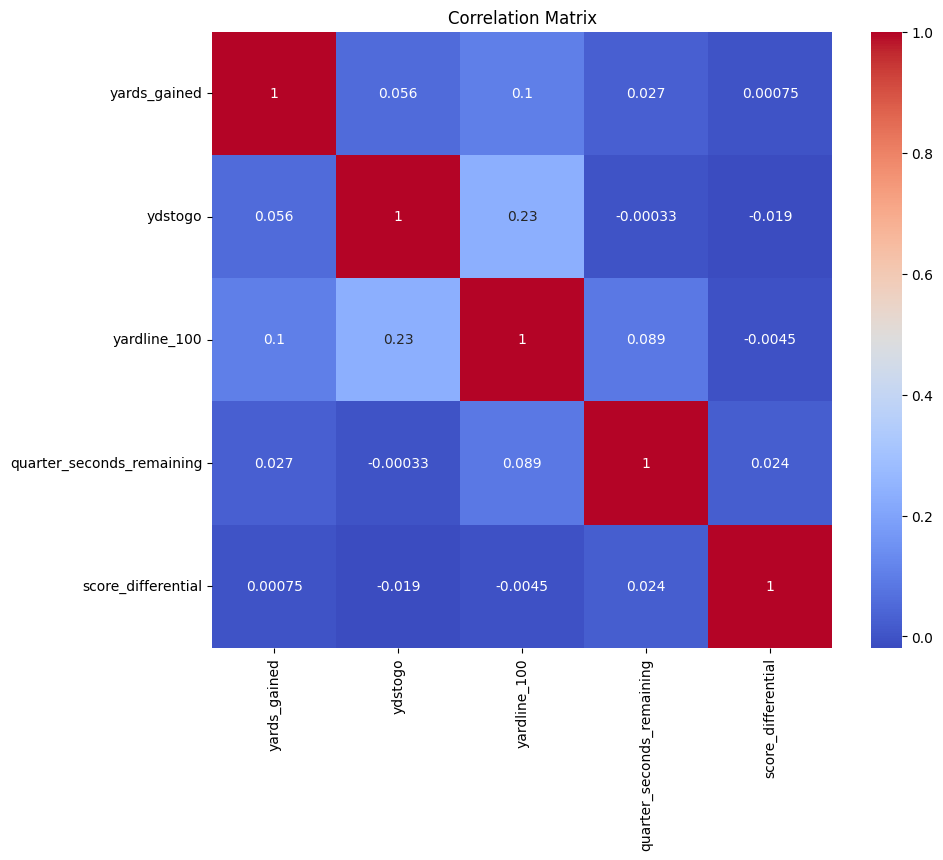

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_cols = ['yards_gained', 'ydstogo', 'yardline_100', 'quarter_seconds_remaining', 'score_differential']
correlation_mtx = nfl[selected_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mtx, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Comment:** There are no strong correlations between the variables. **yardstogo** and **yardline_100** has the strongest correlation with a value of 0.23.

3. Fit a multiple linear regression to predict **yards_gained** using **ydstogo**,
**yardline_100**, **quarter_seconds_remaining**, and **score_differential** as initial set
of predictors. Report the estimated equation.

In [ ]:
import statsmodels.api as sm
X = nfl[['ydstogo', 'yardline_100', 'quarter_seconds_remaining', 'score_differential']]
y = nfl['yards_gained']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
# yards_gained = 2.2862 + 0.0668*ydstogo + 0.0006*quarter_seconds_remaining + 0.0011*score_differential

                            OLS Regression Results                            
Dep. Variable:           yards_gained   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     124.7
Date:                Fri, 19 Sep 2025   Prob (F-statistic):          5.03e-106
Time:                        15:32:28   Log-Likelihood:            -1.4544e+05
No. Observations:               41416   AIC:                         2.909e+05
Df Residuals:                   41411   BIC:                         2.909e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

4.

- Test linear relationships and statistical significance of predictors. If any predictors
appear non-informative remove them and refit the model.

- Investigate if variable transformations is necessary. If so, transform them and
refit the model. Call this the final_model

- Write down the final model.

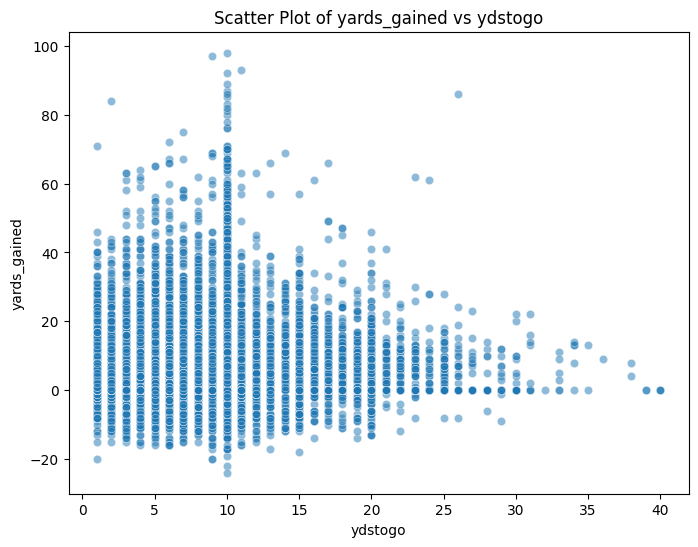

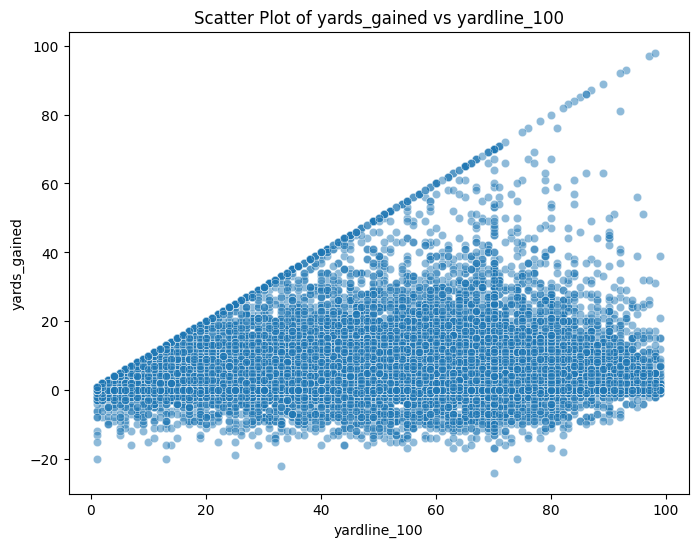

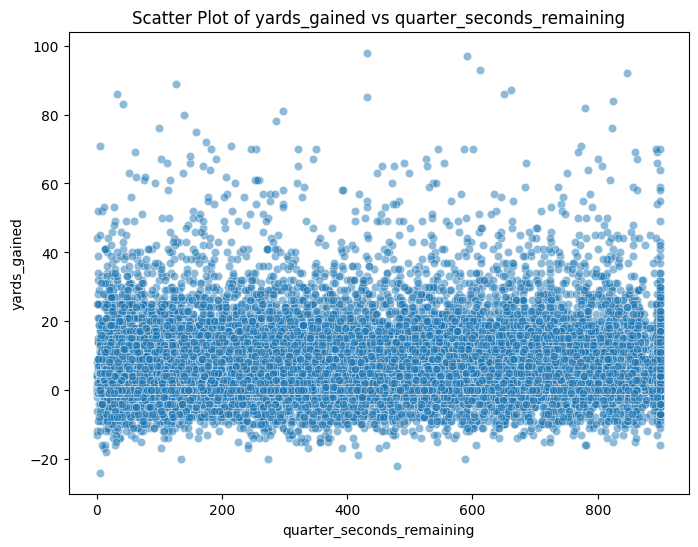

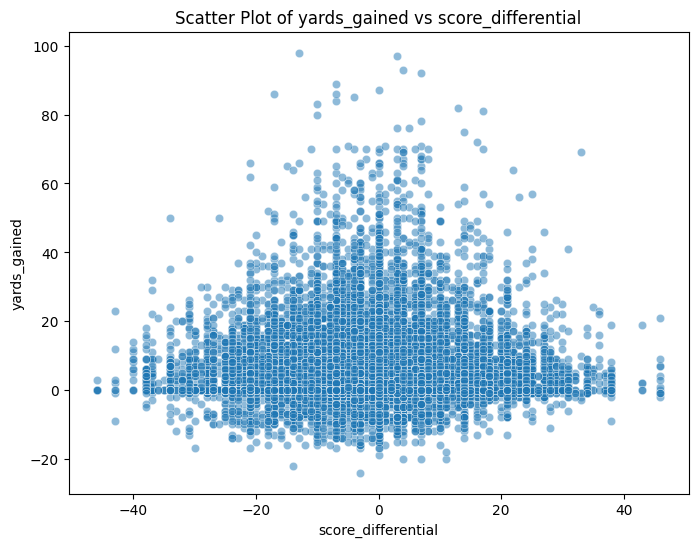

In [ ]:
predictors = ['ydstogo', 'yardline_100', 'quarter_seconds_remaining', 'score_differential']
target = 'yards_gained'

for predictor in predictors:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=nfl, x=predictor, y=target, alpha=0.5)
    plt.title(f'Scatter Plot of {target} vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel(target)
    plt.show()

**Comment:** No transformations were required. We noticed no meaningful patterns that would require a transformation.

In [ ]:
X_refined = nfl[['ydstogo', 'yardline_100', 'quarter_seconds_remaining']]
y = nfl['yards_gained']
X_refined = sm.add_constant(X_refined)
final_model = sm.OLS(y, X_refined).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:           yards_gained   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     166.3
Date:                Fri, 19 Sep 2025   Prob (F-statistic):          3.73e-107
Time:                        15:41:44   Log-Likelihood:            -1.4544e+05
No. Observations:               41416   AIC:                         2.909e+05
Df Residuals:                   41412   BIC:                         2.909e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# yards_gained = 2.2848 + 0.0668*ydstogo + 0.0316*yardline_100 + 0.0006*quarter_seconds_remaining

5. Diagnose linearity, independence, and constant variance for the final_model
briefly comment. If assumptions are questionable, suggest a practical remedy.

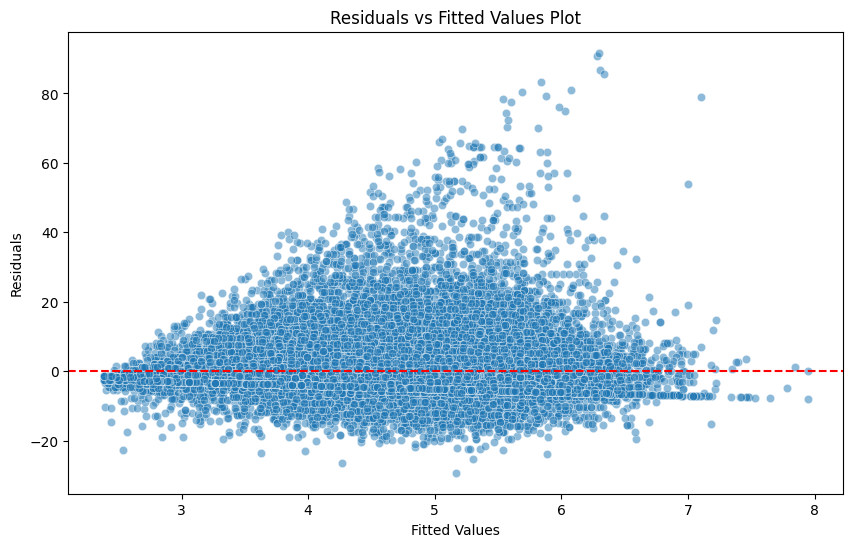

In [ ]:
# Calculate residuals and fitted values
residuals = final_model.resid
fitted_values = final_model.fittedvalues

# Create a residuals plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values Plot')
plt.show()

**Comment:** The residuals are not randomly distributed. The plot has heteroscedasticity. The remedy would be to play around with different transofrmations for the target variable.

6. Report both the $R^2$ and Adjusted-$R^2$ for the final_model and interpret them
in context of play-level yardage.

$R^2$ = 0.012

Adjusted $R^2$ = 0.012

This means that 1.2% of the variance fo the play-level yardage be explained by the model but the predictors are not very informative. The predictors only add a modest amount of explanatory power.

7. Interpret the slope for one predictor of your choice, in the final_model, in
plain language. Include direction, magnitude, and context.

**Comment**: For every ydstogo, there is a 0.0668 increase for yards to gain. In other words, for every 1 yard closer to the first down the offense is, the offense makes 0.0668 yards more on that down.
